DELIVERY TIME

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/delivery_time.csv")

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [6]:
df.rename(columns={"Sorting Time":"sortingtime","Delivery Time":"deliverytime"},inplace=True)

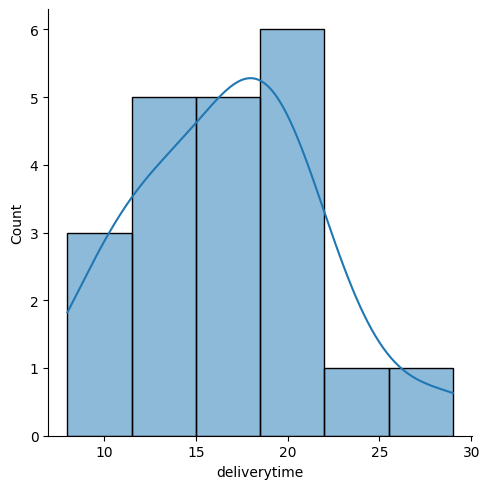

In [7]:
sns.displot(df["deliverytime"],kde=True)

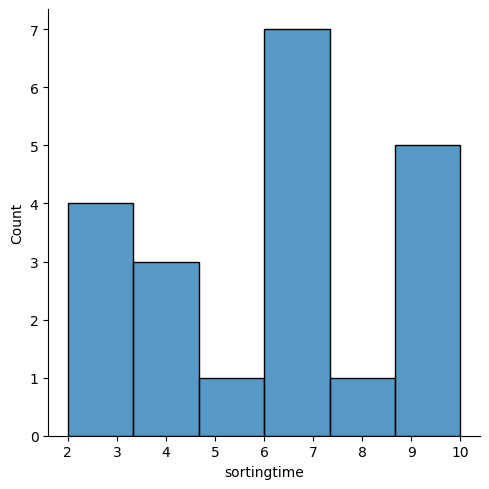

In [8]:
sns.displot(df["sortingtime"])

In [9]:
import statsmodels.formula.api as smf

In [10]:
model=smf.ols("deliverytime~sortingtime",data = df).fit()

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:14:44   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

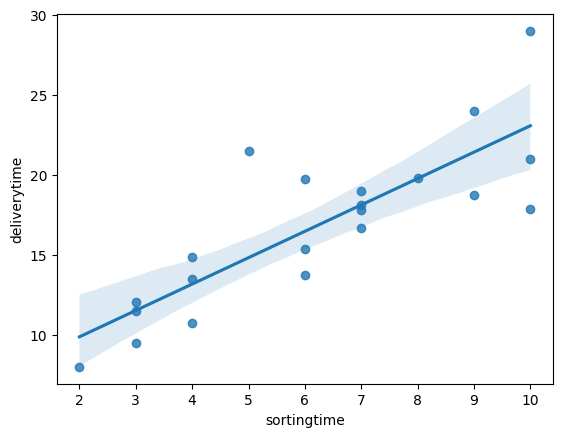

In [12]:
sns.regplot(x="sortingtime",y="deliverytime",data=df)

In [13]:
#prediction

In [14]:
ypred=model.predict(df["sortingtime"])

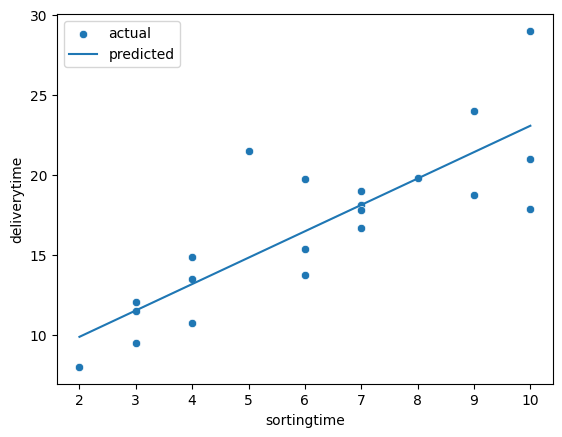

In [15]:
sns.scatterplot(x="sortingtime",y="deliverytime",data=df,label="actual")
sns.lineplot(x="sortingtime",y=ypred,data=df,label="predicted")
plt.legend()

In [16]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [17]:
rmse=np.sqrt(np.mean((np.array(df["deliverytime"])-np.array(ypred))**2))

In [18]:
rmse

2.7916503270617654

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        14:14:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#log tranformation

In [21]:
model2=smf.ols("deliverytime~np.log(sortingtime)",data=df).fit()

In [22]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           2.64e-06
Time:                        14:14:45   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
pred2=model2.predict(df["sortingtime"])

In [24]:
rmse2=np.sqrt(np.mean((np.array(df["deliverytime"])-np.array(pred2))**2))

In [25]:
rmse2

2.733171476682066

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

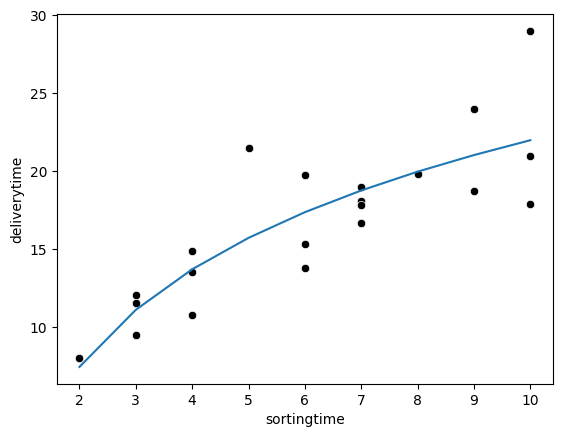

In [26]:
sns.scatterplot(x="sortingtime",y="deliverytime",data=df,color="black")
sns.lineplot(x="sortingtime",y=pred2,data=df)

In [27]:
#model3

In [28]:
model3=smf.ols("np.log(deliverytime)~sortingtime",data=df).fit()

In [29]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Sun, 15 Oct 2023   Prob (F-statistic):           1.59e-06
Time:                          14:14:46   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
sortingtime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#model4 usimg exponential

In [31]:
df["sorting_sq"]=df["sortingtime"]*df["sortingtime"]

In [32]:
df.head()

,deliverytime,sortingtime,sorting_sq
0,21.00,10,100
1,13.50,4,16
2,19.75,6,36
3,24.00,9,81
4,29.00,10,100


In [33]:
model4=smf.ols("np.log(deliverytime)~sortingtime+sorting_sq",data=df).fit()

In [34]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(deliverytime)   R-squared:                       0.765
Model:                              OLS   Adj. R-squared:                  0.739
Method:                   Least Squares   F-statistic:                     29.28
Date:                  Sun, 15 Oct 2023   Prob (F-statistic):           2.20e-06
Time:                          14:14:46   Log-Likelihood:                 9.9597
No. Observations:                    21   AIC:                            -13.92
Df Residuals:                        18   BIC:                            -10.79
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.6997      0.228      7.441      0.000       1.220       2.180
sortingtime     0.2659      0.080      3.315      0.004       0.097       0.434
sorting_sq     -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pred4=model4.predict(df[["sortingtime","sorting_sq"]])

In [36]:
pred4=np.exp(pred4)

In [37]:
rmse4=np.sqrt(np.mean((np.array(df["deliverytime"])-np.array(pred4))**2))

In [38]:
rmse4

2.799041988740932

<Axes: xlabel='sortingtime', ylabel='deliverytime'>

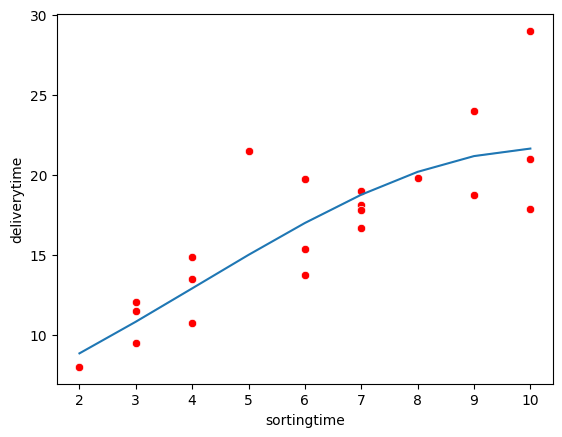

In [39]:
sns.scatterplot(x="sortingtime",y="deliverytime",data=df,color="red")
sns.lineplot(x="sortingtime",y=pred4,data=df)

In [40]:
#model4 is the best model

SALARY HIKE

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df1=pd.read_csv("/content/Salary_Data.csv")

In [43]:
df1

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [45]:
df1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [46]:
import statsmodels.formula.api as smf

In [47]:
model=smf.ols("Salary~YearsExperience",data=df1).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           1.14e-20
Time:                        14:14:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
pred=model.predict(df1["YearsExperience"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

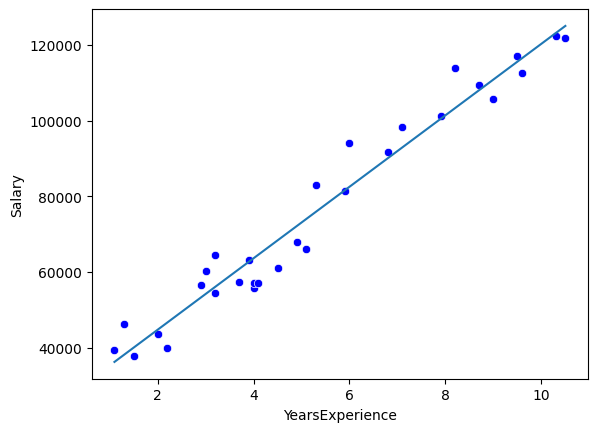

In [50]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df1,color="blue")
sns.lineplot(x="YearsExperience",y=pred,data=df1)

In [51]:
rmse=np.sqrt(np.mean((np.array(df1["Salary"])-np.array(df1["YearsExperience"]))**2))

In [52]:
rmse

80634.98316084652

In [53]:
#model2 using log transformation

In [54]:
model2=smf.ols("Salary~np.log(YearsExperience)",data=df1).fit()

In [55]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           3.25e-13
Time:                        14:19:21   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
pred1=model2.predict(df1["YearsExperience"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

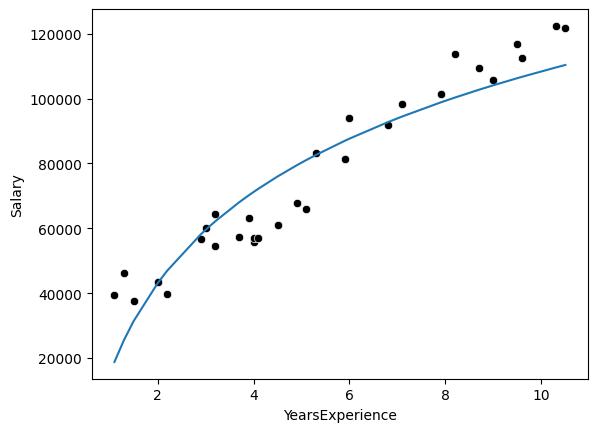

In [59]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df1,color="black")
sns.lineplot(x="YearsExperience",y=pred1,data=df1)


In [64]:
rmse1=np.sqrt(np.mean((np.array(df1["Salary"])-np.array(pred1))**2))

In [65]:
rmse1

10302.893706228306

In [66]:
#model3

In [68]:
model3=smf.ols("np.log(Salary)~YearsExperience",data=df1).fit()

In [69]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sun, 15 Oct 2023   Prob (F-statistic):           7.03e-18
Time:                        14:27:00   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
pred5=model3.predict(df1["YearsExperience"])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

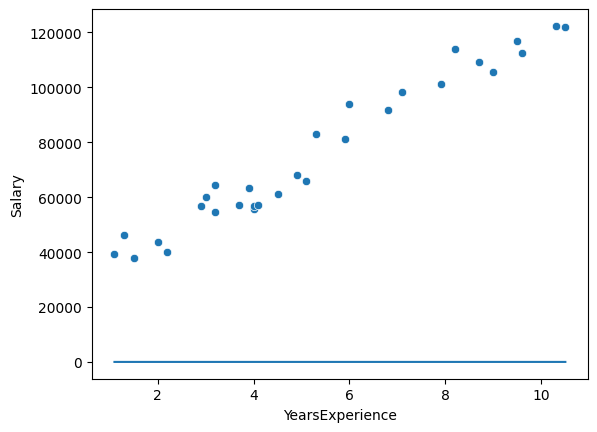

In [79]:
sns.scatterplot(x="YearsExperience",y="Salary",data=df1)
sns.lineplot(x="YearsExperience",y=pred5,data=df1)

In [81]:
rmse3=np.sqrt(np.mean((np.array(df1["Salary"])-np.array(pred5))**2))

In [82]:
rmse3

80630.25750602805

In [83]:
#model2 is considered as the best model model against others as it has lower rmse value than compared with others